In [119]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib import ticker
import seaborn as sns
import os

In [120]:
df = pd.read_csv(os.path.join('../data_samples/FuelConsumption.csv'))
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


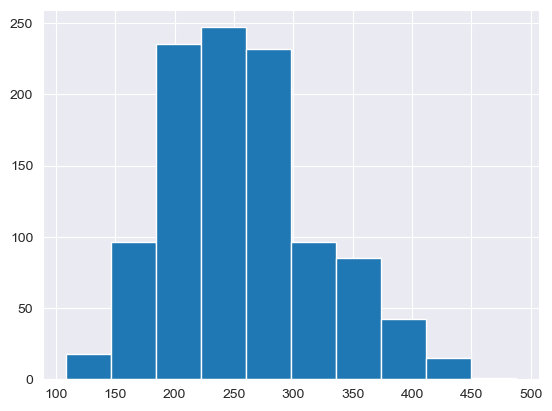

In [122]:
plt.hist(df['CO2EMISSIONS']);

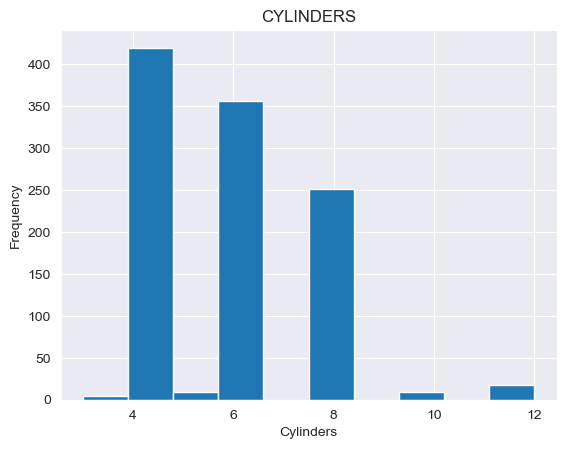

In [123]:

fig , ax = plt.subplots()
ax.hist(df['CYLINDERS'])
ax.set_title('CYLINDERS')
ax.set_xlabel('Cylinders')
ax.set_ylabel('Frequency')
plt.show()

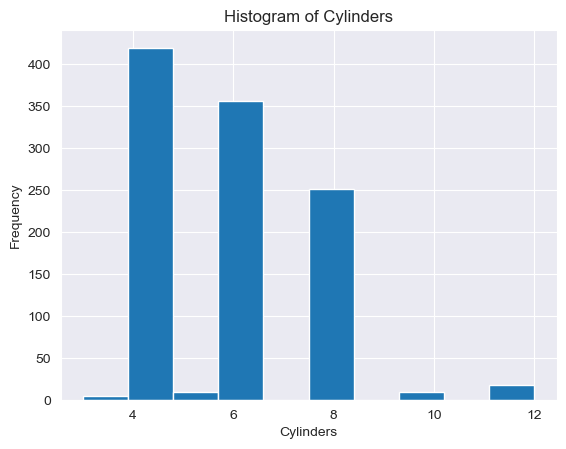

In [124]:
fig , ax = plt.subplots()
ax.hist(df['CYLINDERS'])
ax.set(
    xlabel = 'Cylinders',
    ylabel = 'Frequency',
    title = 'Histogram of Cylinders'
)
plt.show();

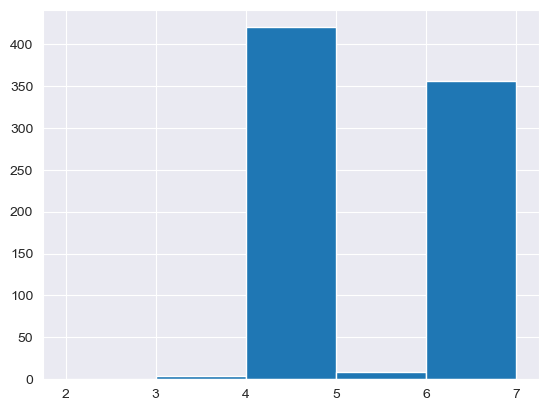

In [125]:
fig , ax = plt.subplots()
ax.hist(df['CYLINDERS'], range(2 ,8));

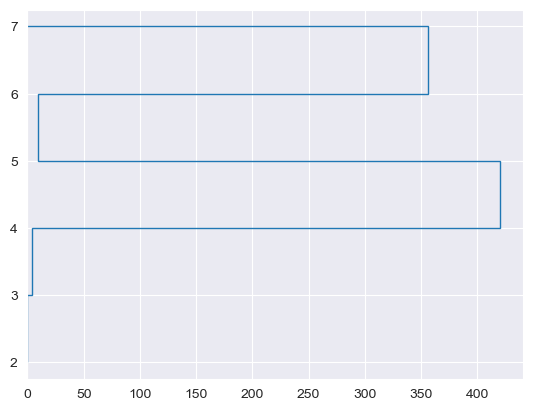

In [126]:
fig , ax = plt.subplots()
ax.hist(df['CYLINDERS'], range(2 ,8) ,histtype='step',orientation='horizontal');

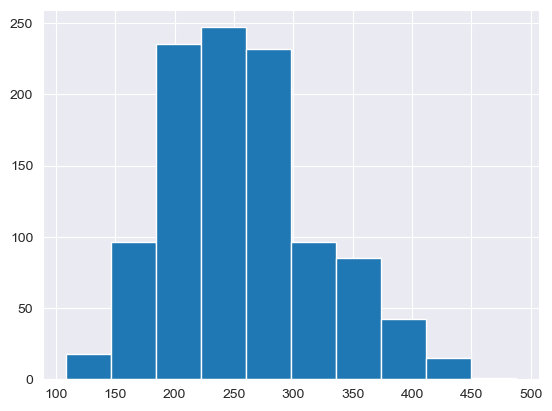

In [127]:
fig , ax = plt.subplots()
ax.hist(df['CO2EMISSIONS'],bins=10);

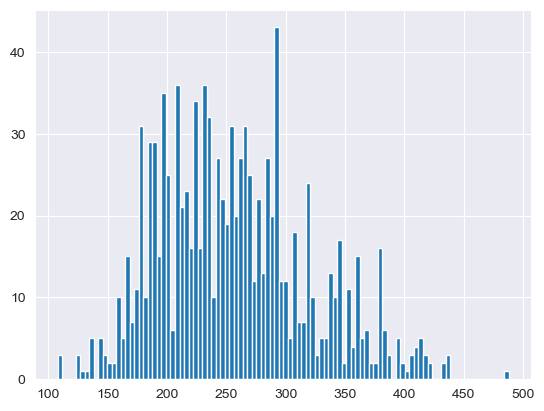

In [128]:
fig , ax = plt.subplots()
ax.hist(df['CO2EMISSIONS'],bins=100);

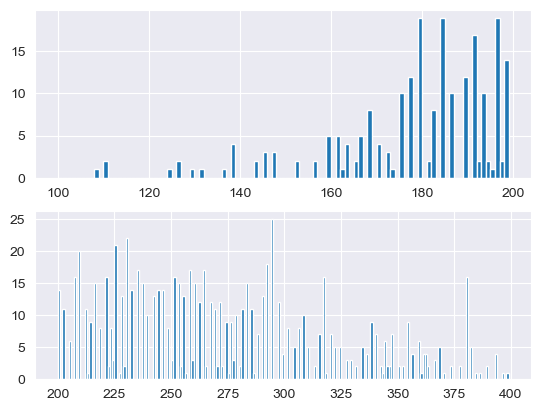

In [129]:
fix ,axe = plt.subplots(2)
axe[0].hist(df['CO2EMISSIONS'] , range(100 , 200) )
axe[1].hist(df['CO2EMISSIONS'] , range(200 , 400) )
plt.show();

C:\Users\ASUS\AppData\Local\Temp\ipykernel_19524\351302579.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(df['CO2EMISSIONS'] , labels=['aii'])


[Text(0.5, 1.0, 'EMISSION distributions'), Text(0, 0.5, 'Emissions')]

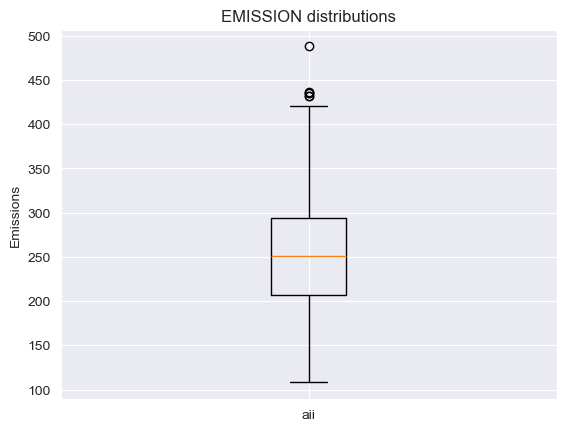

In [130]:
fix , ax = plt.subplots()
ax.boxplot(df['CO2EMISSIONS'] , labels=['aii'])
ax.set(title='EMISSION distributions' , ylabel= 'Emissions')

Text(0.5, 0.98, 'Emission Rate Dist')

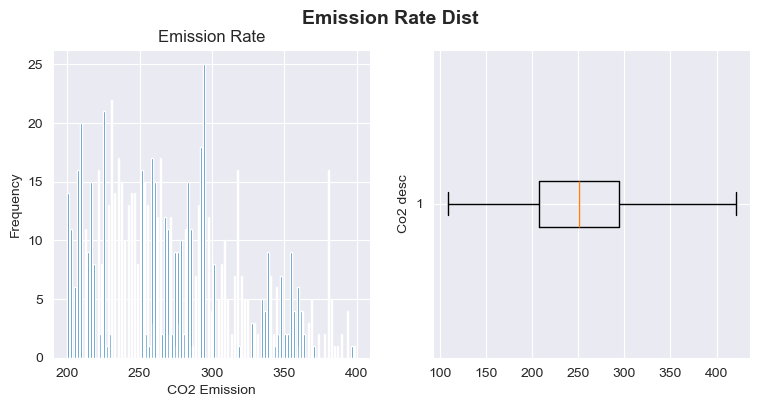

In [131]:
fig , (ax1,ax2) = plt.subplots(nrows=1 , ncols=2,figsize=(9,4))
ax1.hist(df['CO2EMISSIONS'],range(200 ,400))
ax1.set(title = 'Emission Rate' , xlabel = 'CO2 Emission' , ylabel = 'Frequency')

ax2.boxplot(df['CO2EMISSIONS'] , vert=False , showfliers=False)
ax2.set( ylabel = 'Co2 desc')
fig.suptitle('Emission Rate Dist' , fontsize= 14 , fontweight='bold')

In [132]:
avg_by_model = df.groupby(['FUELCONSUMPTION_COMB'] , as_index=False).aggregate({'CO2EMISSIONS':'mean'}).round(2)
avg_by_model

,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,4.7,108.0
1,4.8,110.0
2,5.4,124.0
3,5.5,126.0
4,5.6,129.0
...,...,...
143,22.6,362.0
144,23.0,368.0
145,23.9,382.0
146,25.7,411.0


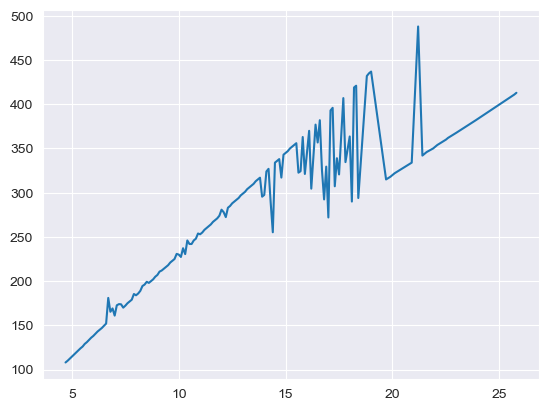

In [133]:
fig , ax = plt.subplots()
ax.plot(avg_by_model['FUELCONSUMPTION_COMB'] , avg_by_model['CO2EMISSIONS'])

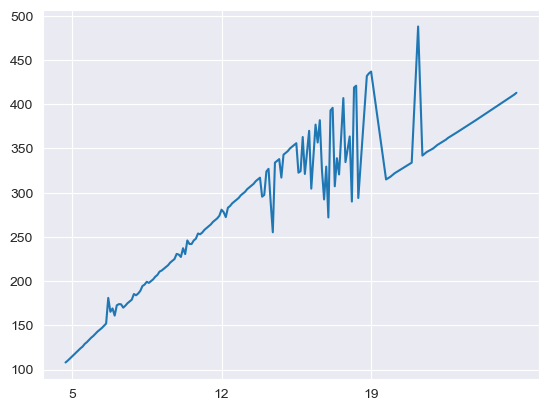

In [134]:
fig , ax = plt.subplots()
ax.plot(avg_by_model['FUELCONSUMPTION_COMB'] , avg_by_model['CO2EMISSIONS'])
ax.set_xticks(np.arange(5,25,7))

<BarContainer object of 148 artists>

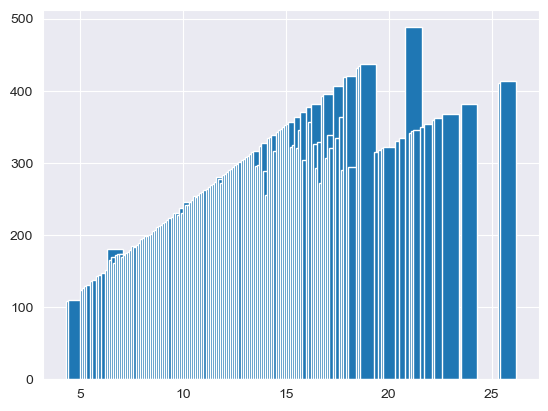

In [135]:
fig , ax = plt.subplots()
ax.bar(avg_by_model['FUELCONSUMPTION_COMB'] ,avg_by_model['CO2EMISSIONS'] )

<BarContainer object of 148 artists>

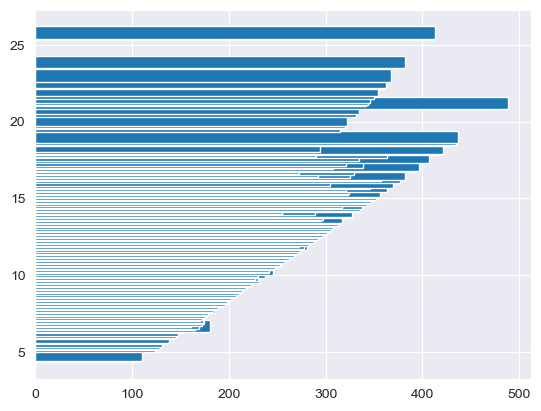

In [136]:
fig , ax = plt.subplots()
ax.barh(avg_by_model['FUELCONSUMPTION_COMB'] ,avg_by_model['CO2EMISSIONS'] )

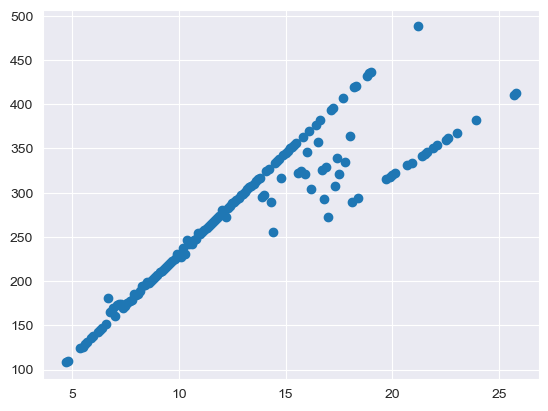

In [137]:
fig , ax = plt.subplots()
ax.scatter(avg_by_model['FUELCONSUMPTION_COMB'] ,avg_by_model['CO2EMISSIONS'] )

Text(0.5, 0.98, 'this is a plot that shows eng size has relation with co2 emissions')

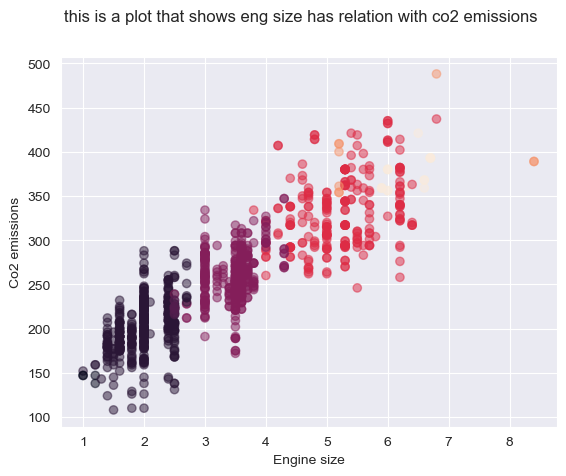

In [138]:
fig ,ax = plt.subplots()
ax.scatter(x = df['ENGINESIZE'] , y=df['CO2EMISSIONS'] , alpha=.5 , c=df['CYLINDERS'])
ax.set(xlabel='Engine size' , ylabel='Co2 emissions')
fig.suptitle('this is a plot that shows eng size has relation with co2 emissions', fontsize= 12)

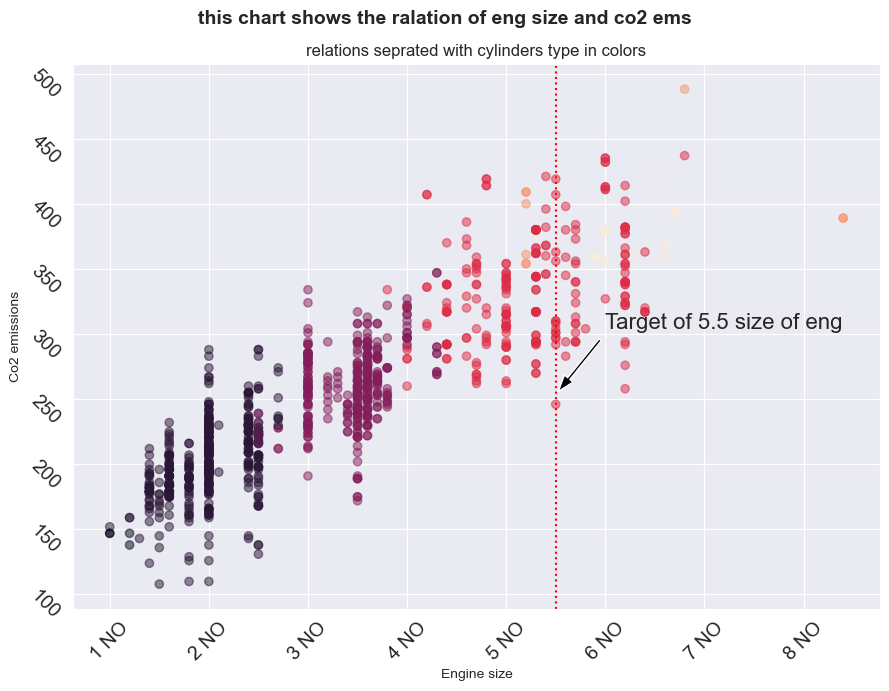

In [139]:
fig, ax = plt.subplots(figsize=(9,7))
ax.scatter(x=df['ENGINESIZE'], y=df['CO2EMISSIONS'], alpha=.5, c=df['CYLINDERS'])
y_min, y_max = ax.get_ylim()
ax.annotate(
    'Target of 5.5 size of eng', 
    xy=(5.5, y_max/2),  
    xytext=(6, y_max/2 + 50),  
    arrowprops=dict(
        facecolor='black',
        shrink=0.05,
        width=2,
        headwidth=8
    ),
    size=16
)
ax.set(title='relations seprated with cylinders type in colors',
       xlabel='Engine size', 
       ylabel='Co2 emissions')
fig.suptitle('this chart shows the ralation of eng size and co2 ems', 
             fontsize=14, 
             fontweight='bold')
ax.xaxis.set_major_formatter('{x:,.0f} NO')
ax.tick_params(axis='x', labelsize=14, labelrotation=45)
ax.tick_params(axis='y', labelsize=14 ,labelrotation=-45)
ax.axvline(5.5, color='red', linestyle=':')
ax.grid(True)
plt.tight_layout()
plt.show()


<Axes: ylabel='Frequency'>

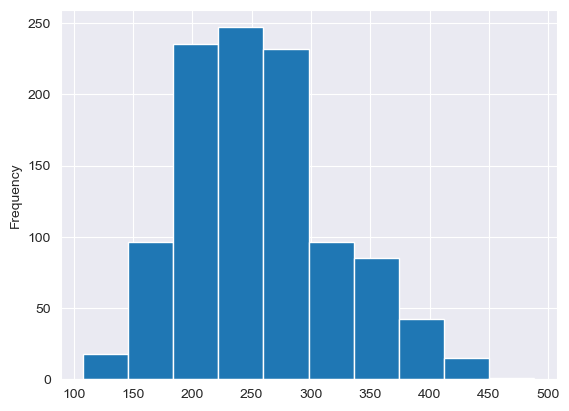

In [140]:
df['CO2EMISSIONS'].plot(kind='hist')

<Axes: ylabel='Density'>

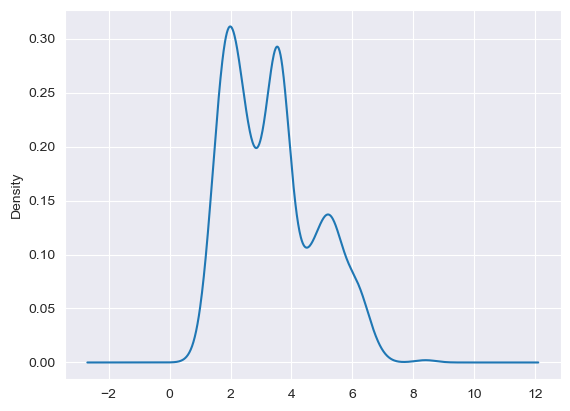

In [141]:
df['ENGINESIZE'].plot(kind='density')

In [142]:
avg_by_model = df.groupby('CYLINDERS').aggregate({'ENGINESIZE' :'mean' , 'CO2EMISSIONS':'mean','FUELCONSUMPTION_COMB':'mean'})
avg_by_model

,ENGINESIZE,CO2EMISSIONS,FUELCONSUMPTION_COMB
CYLINDERS,,,
3,1.100000,144.750000,6.300000
4,1.978095,201.107143,8.744048
5,2.500000,223.888889,9.744444
6,3.462360,260.603933,11.799157
8,5.231349,331.869048,15.631349
10,6.088889,394.777778,17.166667
12,6.300000,375.176471,16.311765


<Axes: title={'center': 'Cylinders in engsize and co2 and consump'}>

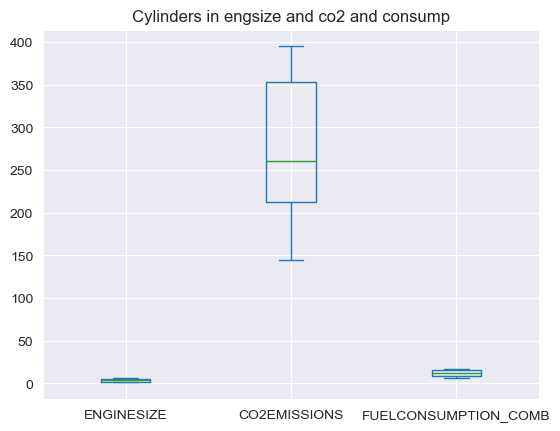

In [143]:
avg_by_model.plot(kind='box' , title='Cylinders in engsize and co2 and consump')

<Axes: xlabel='CYLINDERS'>

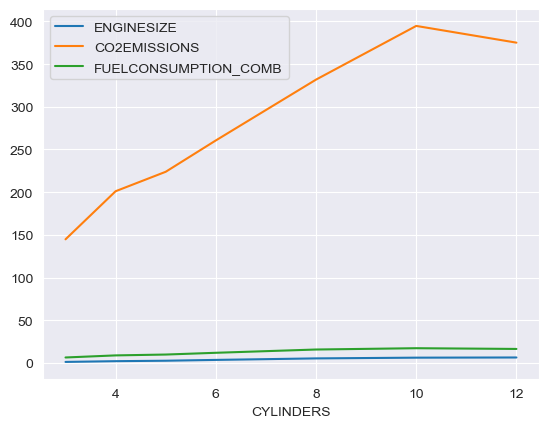

In [144]:
avg_by_model.plot(kind = 'line')

<Axes: xlabel='CYLINDERS'>

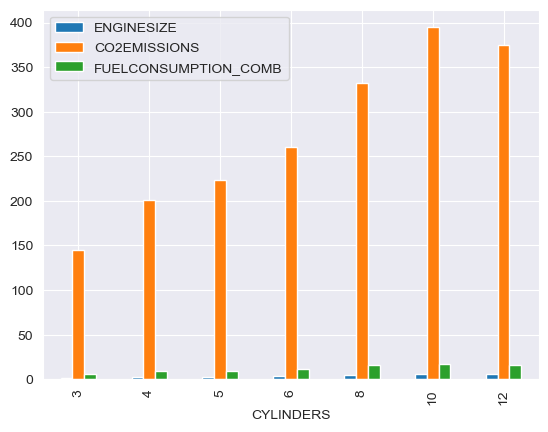

In [145]:
avg_by_model.plot(kind='bar')

<Axes: xlabel='CYLINDERS'>

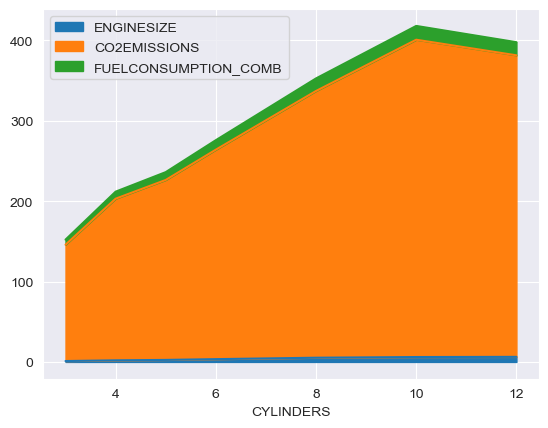

In [146]:
avg_by_model.plot(kind='area')

[Text(0, 0.5, 'Vals')]

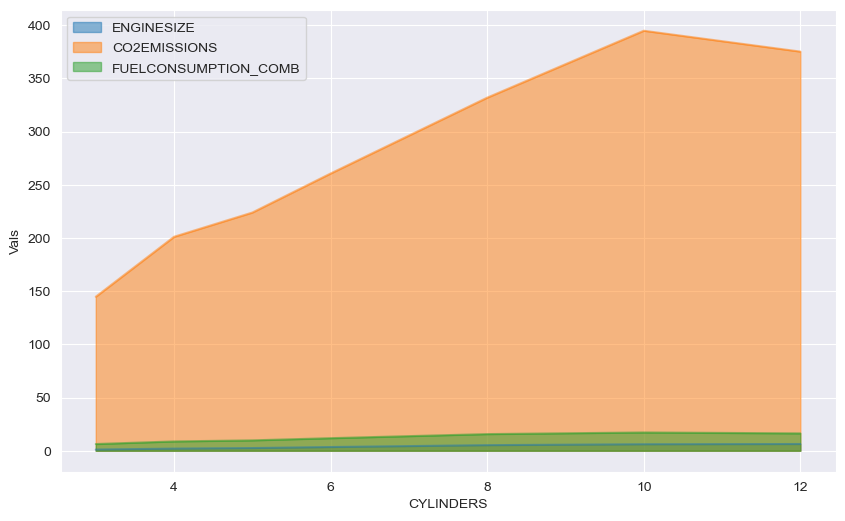

In [147]:
fix ,ax = plt.subplots(figsize=(10,6))
avg_by_model.plot(kind='area' , ax=ax ,stacked=False)
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter("{x:0.0f}"))
ax.set(ylabel='Vals')

<Axes: ylabel='Frequency'>

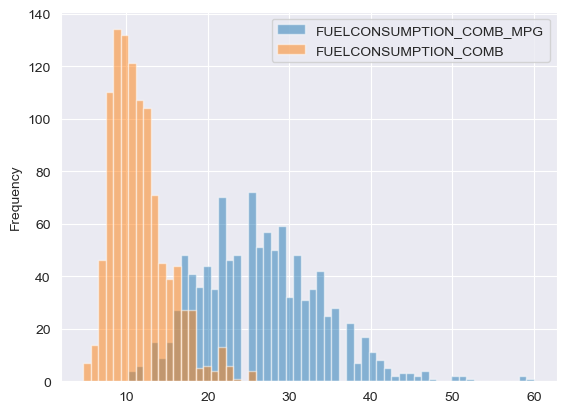

In [148]:
df[['FUELCONSUMPTION_COMB_MPG' , 'FUELCONSUMPTION_COMB' ]].plot(kind='hist' , alpha=.5,bins=60)

array([[<Axes: title={'center': 'FUELCONSUMPTION_COMB'}>,
        <Axes: title={'center': 'FUELCONSUMPTION_COMB_MPG'}>]],
      dtype=object)

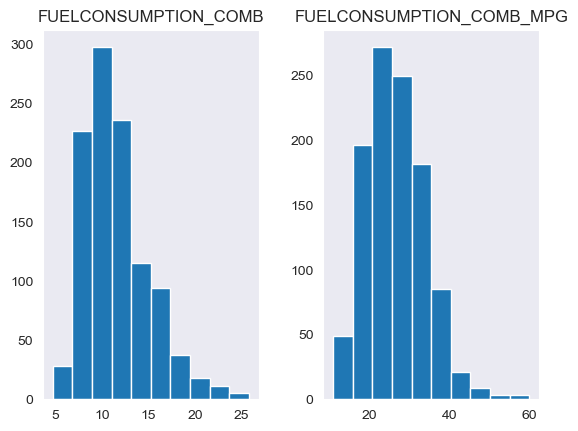

In [149]:
df.hist(column=['FUELCONSUMPTION_COMB','FUELCONSUMPTION_COMB_MPG'] , grid=False)

array([[<Axes: title={'center': 'FUELCONSUMPTION_COMB'}>],
       [<Axes: title={'center': 'FUELCONSUMPTION_COMB_MPG'}>],
       [<Axes: title={'center': 'FUELCONSUMPTION_CITY'}>]], dtype=object)

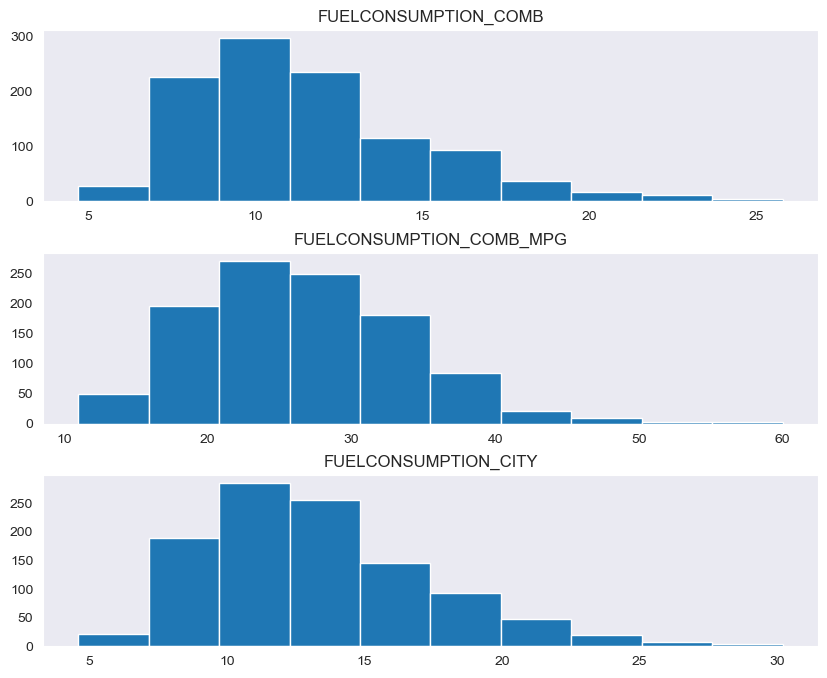

In [150]:
df.hist(column=['FUELCONSUMPTION_COMB','FUELCONSUMPTION_COMB_MPG','FUELCONSUMPTION_CITY'] , grid=False , figsize=(10,8),layout=(3,1))

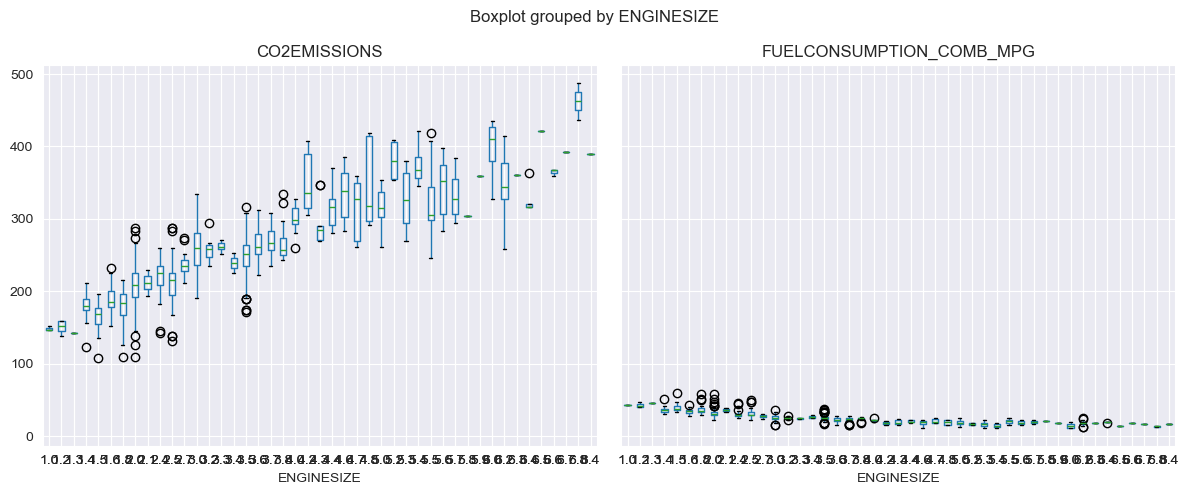

In [151]:
fig = df.boxplot(column=['CO2EMISSIONS', 'FUELCONSUMPTION_COMB_MPG'], 
                 by='ENGINESIZE', 
                 figsize=(12,5))

ax = plt.gca()


plt.tight_layout()
plt.show()

In [152]:
sns.set_style('darkgrid')

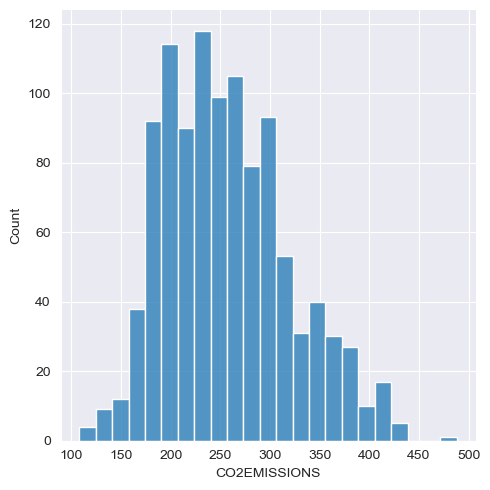

In [153]:
sns.displot(df , x = 'CO2EMISSIONS')

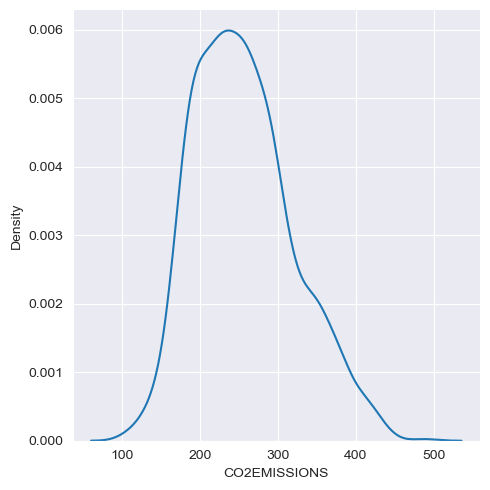

In [154]:
sns.displot(data=df , x="CO2EMISSIONS" , kind='kde')

<Axes: xlabel='CO2EMISSIONS', ylabel='Count'>

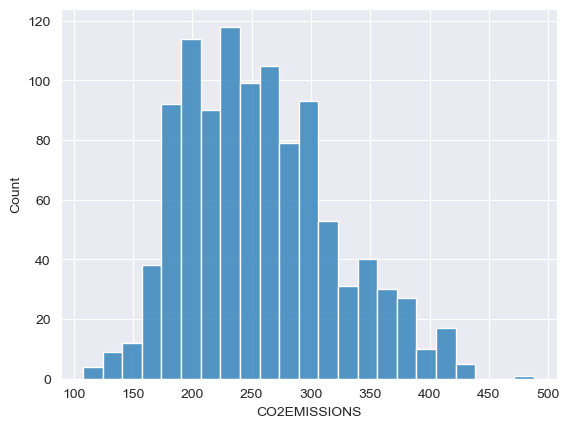

In [155]:
sns.histplot(data = df , x = 'CO2EMISSIONS')

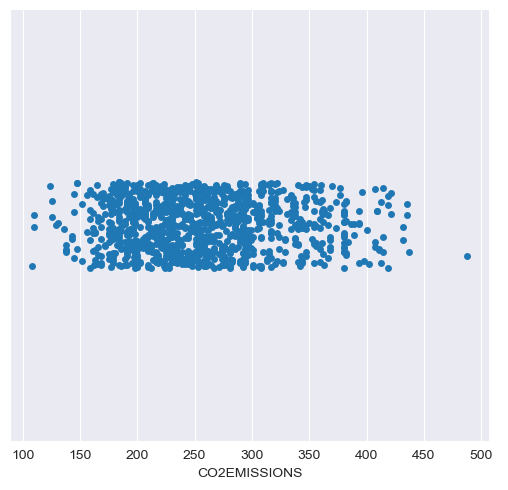

In [156]:
sns.catplot(data = df , x='CO2EMISSIONS')

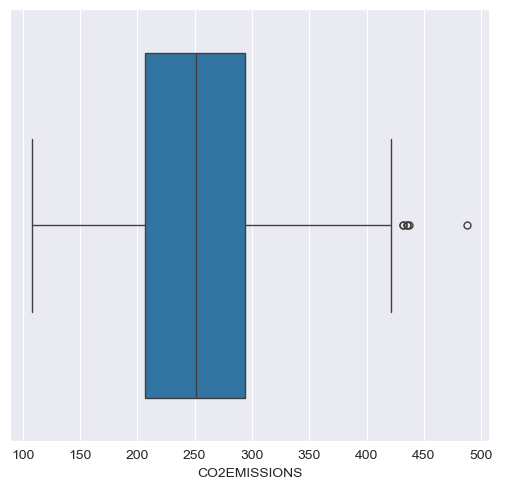

In [157]:
sns.catplot(data = df , x='CO2EMISSIONS' , kind='box')

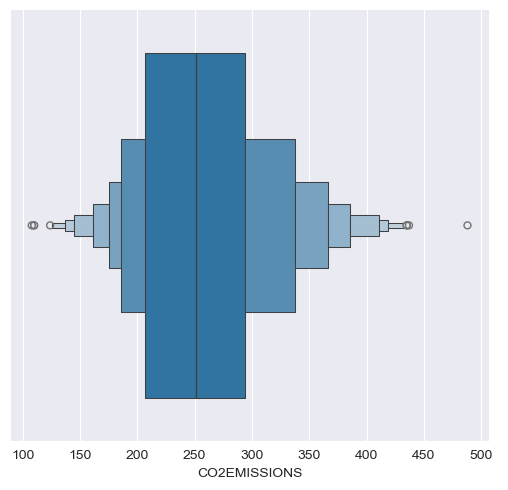

In [158]:
sns.catplot(data = df , x='CO2EMISSIONS' , kind='boxen')

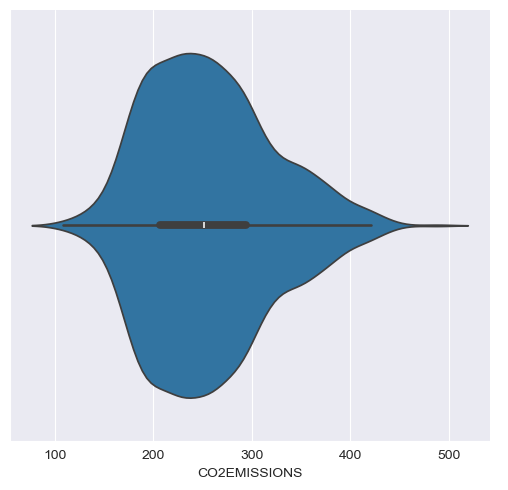

In [159]:
sns.catplot(data = df , x='CO2EMISSIONS' , kind='violin')

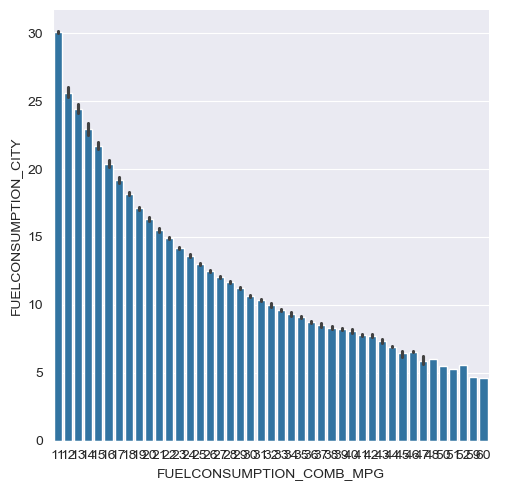

In [160]:
sns.catplot(data=df , y='FUELCONSUMPTION_CITY' , x='FUELCONSUMPTION_COMB_MPG' , kind='bar')

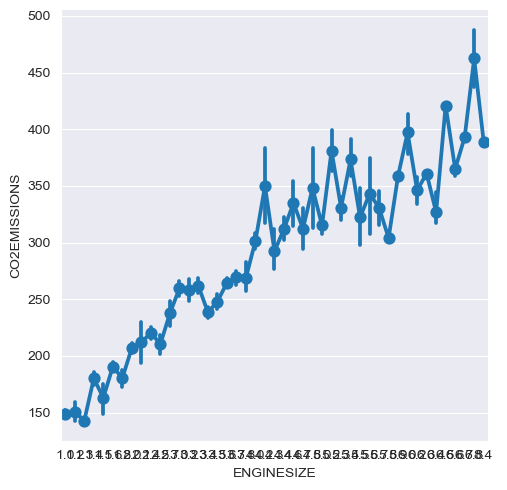

In [161]:
sns.catplot(data=df , y='CO2EMISSIONS' , x='ENGINESIZE' , kind = 'point')

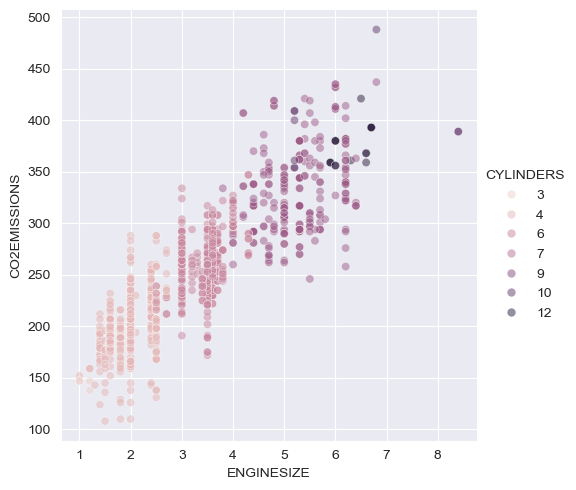

In [162]:
sns.relplot(data=df , x='ENGINESIZE' , y='CO2EMISSIONS' , hue='CYLINDERS'  , alpha=0.5)

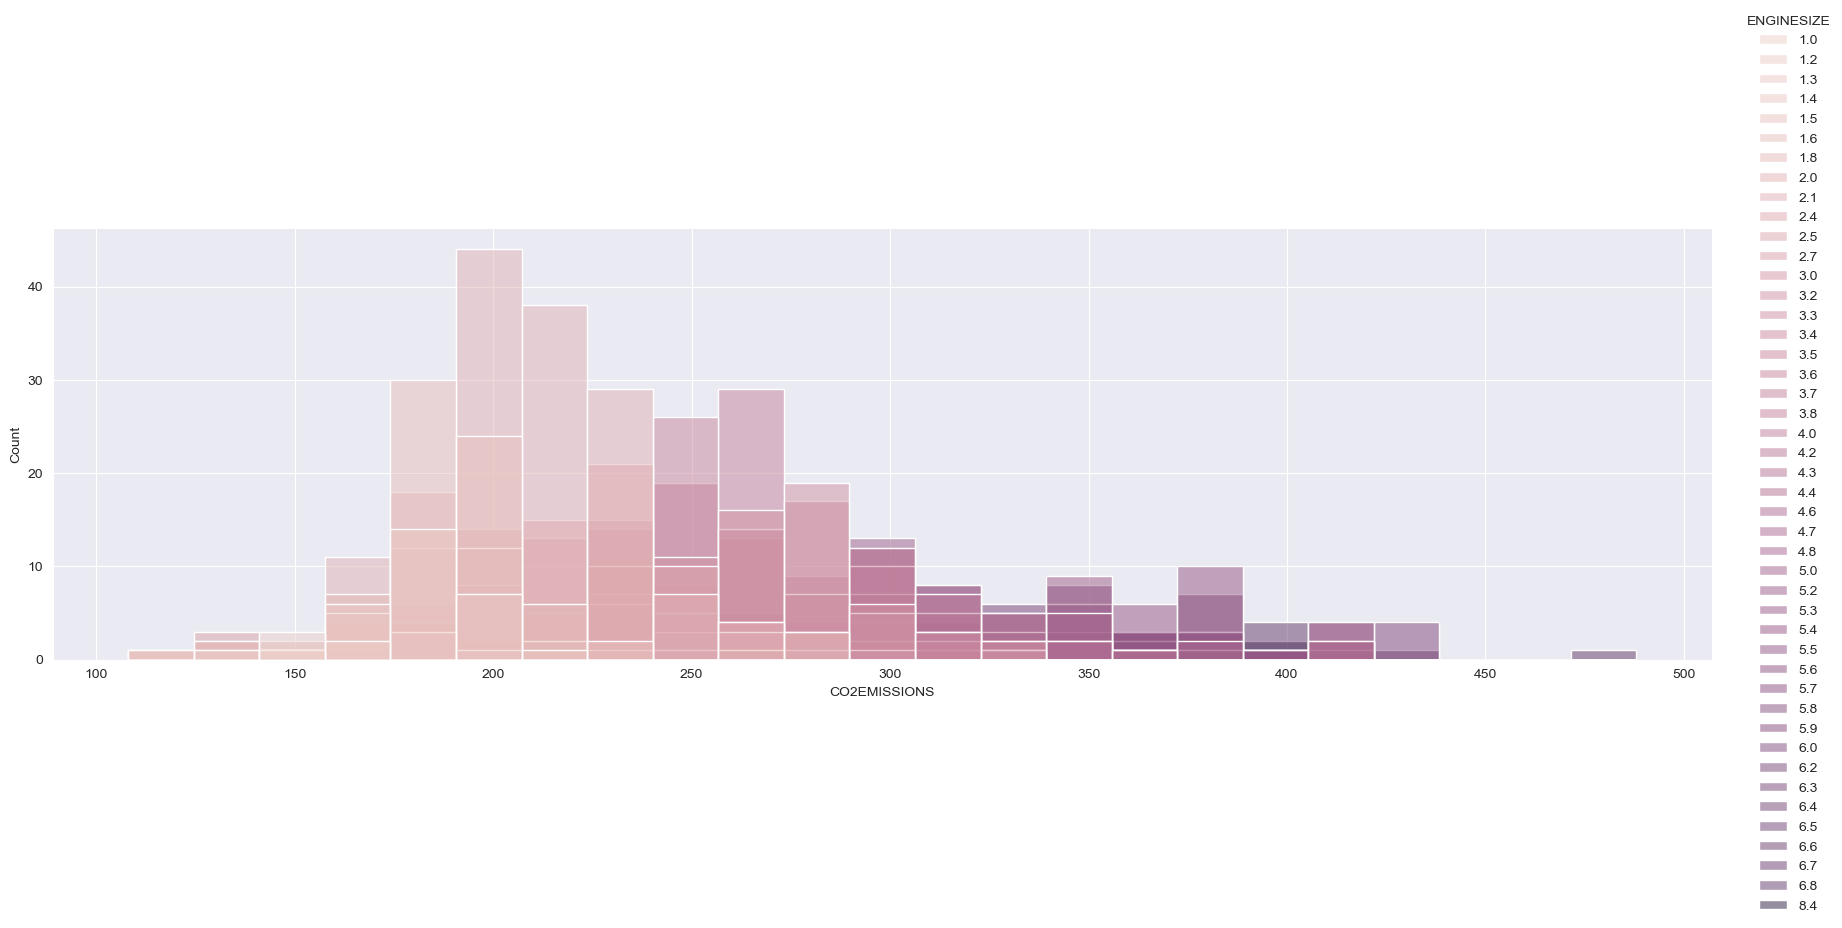

In [163]:
sns.displot(data=df, x='CO2EMISSIONS'  , hue='ENGINESIZE', aspect=3.5 )

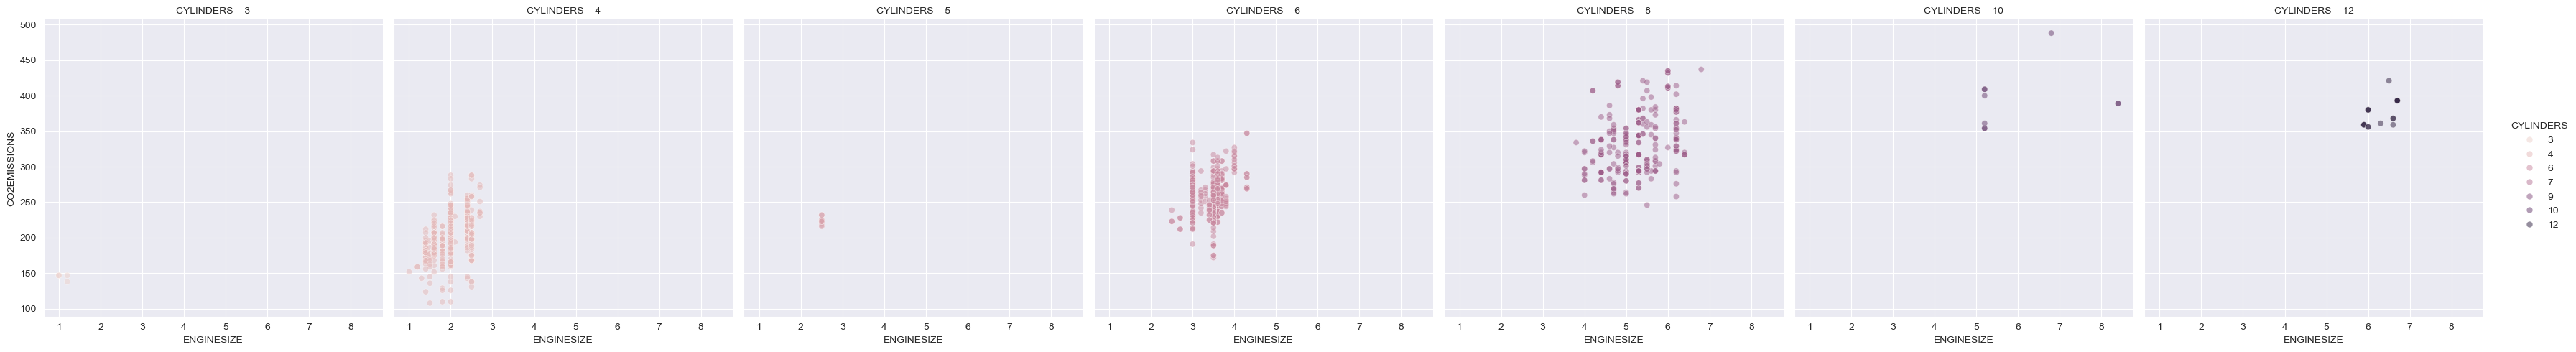

In [164]:
sns.relplot(data=df , x='ENGINESIZE' , y='CO2EMISSIONS' , kind='scatter' , alpha=.5 , col = 'CYLINDERS' , hue='CYLINDERS')

In [169]:
heat_df = pd.crosstab(df['ENGINESIZE'],df['CO2EMISSIONS'] ,values=df['CYLINDERS'],aggfunc='mean' )
heat_df.head()

CO2EMISSIONS,108,110,124,126,129,131,136,138,143,145,...,409,411,413,414,419,421,432,435,437,488
ENGINESIZE,,,,,,,,,,,,,,,,,,,,,
1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1.4,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1.5,4.0,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: xlabel='CO2EMISSIONS', ylabel='ENGINESIZE'>

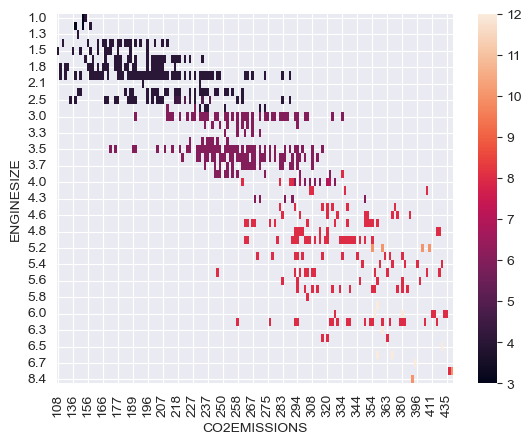

In [170]:
sns.heatmap(heat_df)

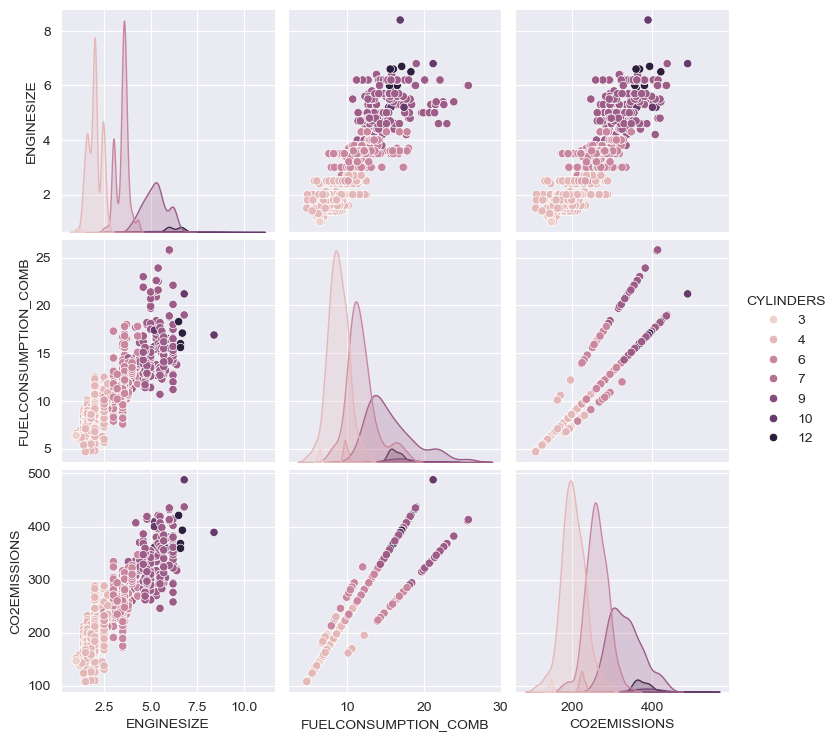

In [172]:
sns.pairplot(df ,
             x_vars=['ENGINESIZE' ,'FUELCONSUMPTION_COMB' , 'CO2EMISSIONS'], y_vars=['ENGINESIZE' ,'FUELCONSUMPTION_COMB' , 'CO2EMISSIONS'] , hue='CYLINDERS')

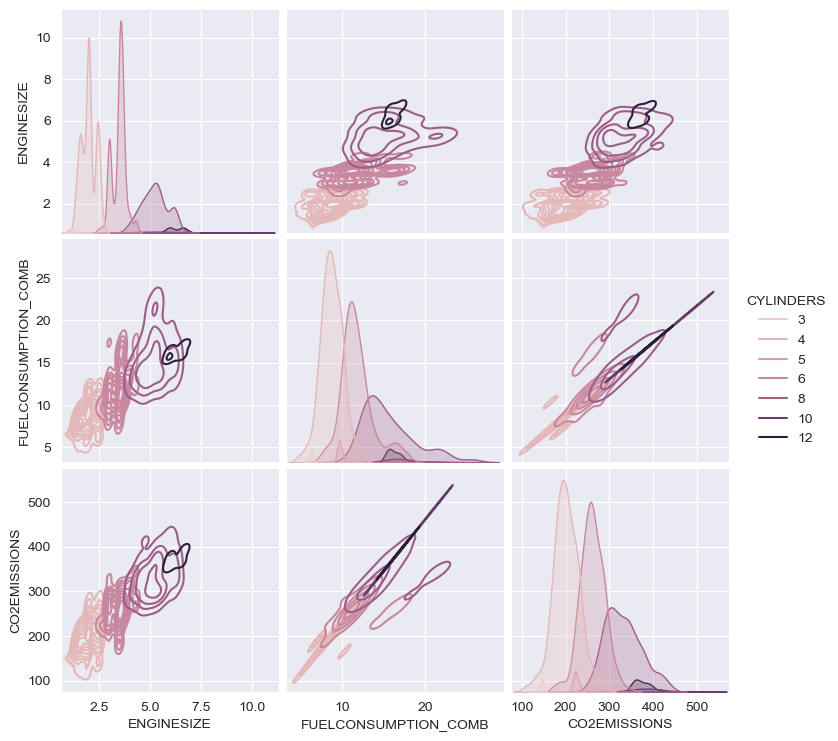

In [173]:
sns.pairplot(df ,
             x_vars=['ENGINESIZE' ,'FUELCONSUMPTION_COMB' , 'CO2EMISSIONS'], y_vars=['ENGINESIZE' ,'FUELCONSUMPTION_COMB' , 'CO2EMISSIONS'] , hue='CYLINDERS',kind='kde')